<a href="https://colab.research.google.com/github/EdgarCastanon/Simulacion/blob/main/Unidad_3/Ejercicio2_Distribuci%C3%B3n_Exponencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema 2: Distribución Exponencial

**Nombre del alumno**: Edgar Ailton Castañón Galván  
**Número de Control**: 23040991  
**Fecha**: 27/03/2025  
**Curso**: SCD1022 SIMULACION  
**Institución**: Instituto Tecnológico de Durango  
**Profesor**: RODRIGUEZ RIVAS JOSE GABRIEL

# Simulación de Tiempos entre Llegadas de Vehículos (Distribución Exponencial)  

## Introducción  
Este programa simula la llegada de vehículos a una estación de carga rápida. La llegada sigue una distribución exponencial con un promedio de 1 vehículo cada 15 minutos.  

## Objetivo  
Modelar los tiempos entre llegadas durante un período de operación de 12 horas para prever la demanda de puntos de carga.  

## Pasos del Código  
1. **Definir Parámetros**: Se establece la tasa de llegadas y la duración del período de operación.  
2. **Generar Tiempos entre Llegadas**: Se utilizan números aleatorios con distribución exponencial.  
3. **Calcular Estadísticas**: Se obtiene la media, desviación estándar y número total de llegadas.  
4. **Visualización de Datos**:  
   - **Histograma y densidad estimada**: Muestra la distribución de los tiempos entre llegadas.  
   - **Gráfico de llegadas acumuladas**: Representa el crecimiento del número de vehículos en la estación a lo largo del tiempo.  

## Conclusión  
Este modelo permite estimar la demanda de carga en diferentes momentos del día, ayudando en la planificación de infraestructura para estaciones de carga.  



Número total de llegadas en 12 horas: 43
Media de tiempos entre llegadas: 14.72 minutos
Desviación estándar: 14.16 minutos


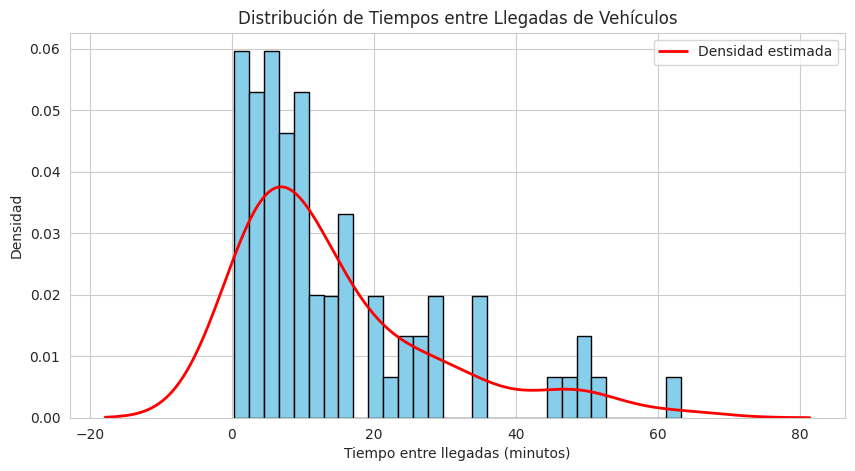

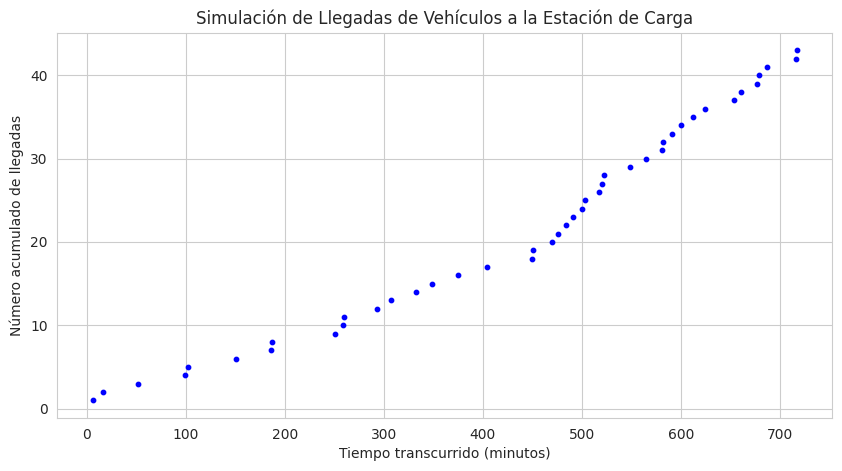

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros de la distribución exponencial
tasa_llegadas = 1 / 15  # 1 llegada cada 15 minutos
tiempo_operacion = 12 * 60  # 12 horas en minutos

# Simulación de tiempos entre llegadas de vehículos
tiempos_entre_llegadas = np.random.exponential(1 / tasa_llegadas, int(tiempo_operacion * tasa_llegadas * 1.5))

# Acumulación de tiempos para obtener los momentos de llegada
momentos_llegada = np.cumsum(tiempos_entre_llegadas)
momentos_llegada = momentos_llegada[momentos_llegada <= tiempo_operacion]  # Filtrar llegadas dentro del horario

# Cálculo de estadísticas
media_llegadas = np.mean(tiempos_entre_llegadas)
desviacion_llegadas = np.std(tiempos_entre_llegadas)
n_llegadas = len(momentos_llegada)

# Mostrar los resultados
print(f"Número total de llegadas en 12 horas: {n_llegadas}")
print(f"Media de tiempos entre llegadas: {media_llegadas:.2f} minutos")
print(f"Desviación estándar: {desviacion_llegadas:.2f} minutos")

# Configurar estilo del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.hist(tiempos_entre_llegadas, bins=30, color='skyblue', edgecolor='black', density=True)
sns.kdeplot(tiempos_entre_llegadas, color='red', linewidth=2, label='Densidad estimada')
plt.xlabel('Tiempo entre llegadas (minutos)')
plt.ylabel('Densidad')
plt.title('Distribución de Tiempos entre Llegadas de Vehículos')
plt.legend()
plt.show()

# Gráfico de momentos de llegada
plt.figure(figsize=(10, 5))
plt.scatter(momentos_llegada, np.arange(1, len(momentos_llegada) + 1), color='blue', s=10)
plt.xlabel('Tiempo transcurrido (minutos)')
plt.ylabel('Número acumulado de llegadas')
plt.title('Simulación de Llegadas de Vehículos a la Estación de Carga')
plt.show()